#Импортируем необходимые библиотеки и данные#

In [ ]:
from cvxopt import matrix, spmatrix
import numpy as np
import pandas as pd
from cvxopt.solvers import options, qp
from cvxopt.blas import dot
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('./Baza.xlsx')

#Вычислим ожидаемые доходности и ков. матрицу#

Депозит по ставке ЦБ

In [ ]:
CB_rate = 5.2

In [ ]:
Market = np.array(df['MMBБ(MicexIndexCF)'])
GAZP = np.array(df['GAZP'])
FEES = np.array(df['FEES(ФСК)'])
LKOH = np.array(df['LKOH'])
SBER = np.array(df['SBER03'])
ROSN = np.array(df['ROSN'])
VTBR = np.array(df['VTBR'])

data = np.array([Market, GAZP, FEES, LKOH, SBER, ROSN, VTBR])

In [ ]:
expected_return = np.array([CB_rate/100])#средняя дох-сть
standard_deviation = np.array([])#стандартное отклонение
market_return, market_deviation = 0, 0
rets = np.zeros((6,22))
for i in range(7):
  arr = data[i]
  if i == 0:
    ret = [(arr[j+1]-arr[0])/arr[0]*365/(j+1) for j in range(arr.size-1)]
    market_return = np.mean(ret)
    market_deviation = np.std(ret)
    continue
  rets[i-1] = [((arr[j+1]-arr[0])/arr[0] * 365/(j+1)) for j in range(arr.size-1)]
  expected_return = np.append(expected_return, np.mean(rets[i-1]))
  standard_deviation = np.append(standard_deviation, np.std(rets[i-1]))
np.set_printoptions(precision=3)
covariations = np.cov(rets)#матрица ковариаций

covariations = np.concatenate((np.zeros((1, 6)), covariations), axis=0)
covariations = np.concatenate((np.zeros((7, 1)), covariations), axis=1)
#print(expected_return)

#Доп.ограничения

In [ ]:
A = matrix([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], (1, 7))
b = matrix([1.0], (1, 1))

##1 вид ограничений

In [ ]:
l = -np.array([.0, 0,.0,.0,.0,.0,.0])
u = np.array([1.0, 1.0,1.0,1.0,1.0,1.0,1.0])

Gx<=h 

-x <= l -> x >= -l

x <= u


In [ ]:
G = matrix([[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0],
            [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
G = G.trans()
h = matrix(np.concatenate((l.T,u.T)).T.tolist(),(14,1))

##2 вид ограничений

In [ ]:
l = -np.array([.0,.0,.0,.0,.0])
u = np.array([1.,1.,1.,1.,1.])

In [ ]:
G = matrix([[0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0], 
          [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0], 
          [0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0], 
          [0.0, 0.0, -1.0, -1.0, -1.0, 0.0, -1.0], 
          [0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0],  
          [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], 
          [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], 
          [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],  
          [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]]) 
G = G.trans()
h = matrix(np.concatenate((l.T,u.T)).T.tolist(),(10,1))

##3 вид ограничений

In [ ]:
l = np.array([.02,.02,.02,.02,.02])
u = np.array([1.,1.,1.,1.,1.])

In [ ]:
G1 = np.array([[1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
            [1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 1.0, 1.0, 1.0]])
#G1 = G1.trans()

In [ ]:
G2 = np.array([[1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
            [0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
            [1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
            [0.0, 1.0, 0.0, 1.0, 1.0, 1.0]])
G = np.concatenate((-G1+np.dot(l, G2), G1-np.dot(u, G2)), axis=0)
G = matrix(G.tolist(), (10,6))
h = matrix(np.zeros((10,1)).tolist(), (10, 1))
G = G.trans()

##Граница эффективности для портфеля акций


Настало время для использования солвера

In [ ]:
options['show_progress'] = False
theta = 10
P = matrix((theta * covariations).tolist(), (7,7))
q = -matrix(expected_return.tolist(),(1,7)).trans()
ans = qp(P, q, G, h, A, b)['x']
print(ans)

[ 6.60e-01]
[ 1.87e-09]
[ 1.83e-09]
[ 1.83e-01]
[ 6.77e-02]
[ 4.33e-09]
[ 9.00e-02]



In [ ]:
companies = df.columns[3:9]
print("Доля безрискового актива = ", np.round(ans[0],3))
for x in range(6):
  print(str("Доля "+ str(companies[x])).ljust(25,' '), end='')
  print("= ",np.round(ans[x+1],3))

Доля безрискового актива =  0.66
Доля GAZP                =  0.0
Доля FEES(ФСК)           =  0.0
Доля LKOH                =  0.183
Доля SBER03              =  0.068
Доля ROSN                =  0.0
Доля VTBR                =  0.09


In [ ]:
print("Ожидаемые доходности портфеля и рынка: ")
print(np.round((np.dot(expected_return, ans)*100)[0], 3),"% и ",np.round(market_return*100, 3), "%")

Ожидаемые доходности портфеля и рынка: 
402.851 % и  94.4 %


##Построение графика эффективности


 X: 
 [[-0.548]
 [ 0.25 ]
 [ 0.25 ]
 [ 0.28 ]
 [ 0.25 ]
 [ 0.25 ]
 [ 0.268]]

E:
 0.9439955807242009


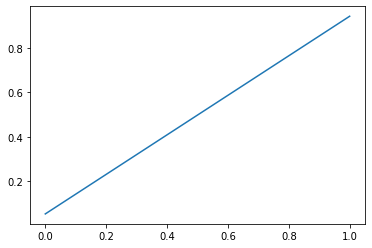

In [ ]:
x = np.array(qp(P, q, G, h, A, b)['x'])
print("\n X: \n", x)

#V = 1 - CB_rate/100
#print("\nV:\n", V)
E = market_return
print("\nE:\n", E)
plt.plot([0, 1], [CB_rate/100, E])
plt.show()

УРА 

Мы построили график границы эффективности!!!

Мы молодцы